<a href="https://colab.research.google.com/github/sasumwen/DogVision/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

# End-to-end multi-class dog breed classification

This notebook builds an end2end multiclass dog breed classification using tensorflow hub and tensorflow 2.0

data is got from kaggle dog breed identification competition

In [2]:
# import TensorFlow and tf hub into colab
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__) 
print(hub.__version__)

2.9.2
0.12.0


In [3]:
# check for GPU availability
print("GPU available" if tf.config.list_physical_devices("GPU")else "not available")

GPU available


## Getting the data ready
(turning into tensors)

In [4]:
# checkout data labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")

In [5]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


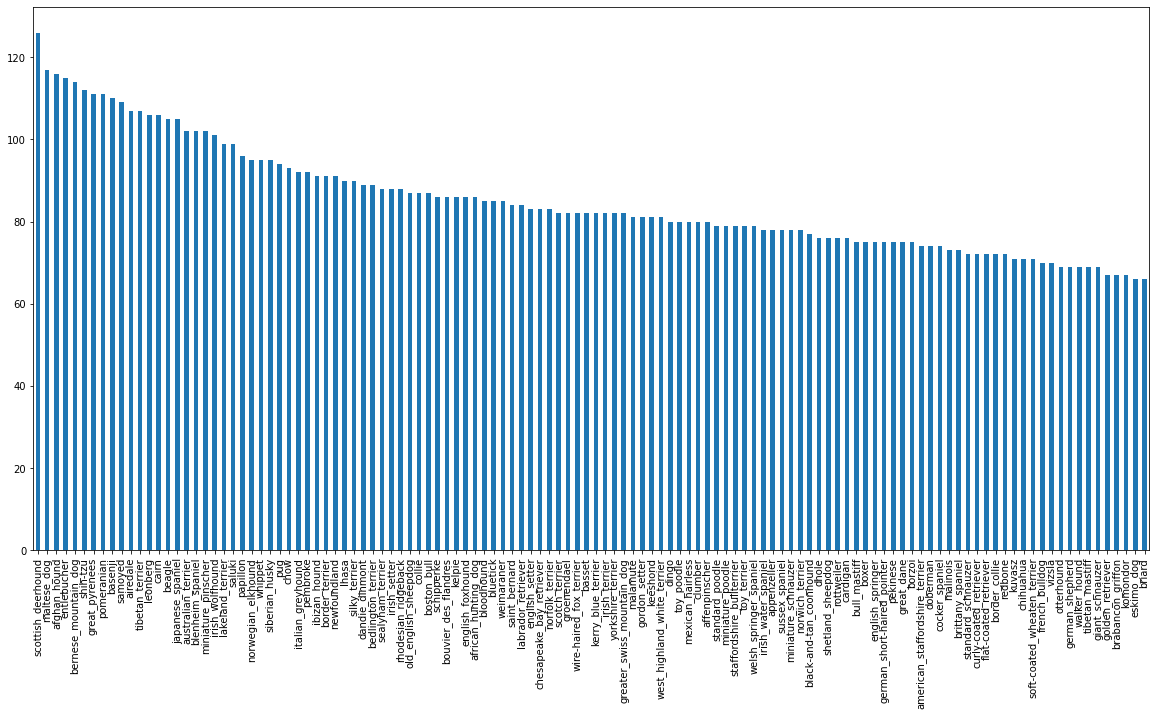

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

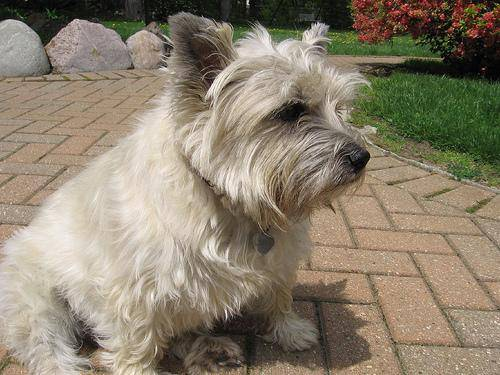

In [7]:




#view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg")

# Getting images and their labels



In [8]:
# create pathnames from image ID's

filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [9]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("proceed")
else:
  print("error")
  

proceed


In [11]:
len(filenames)

10222

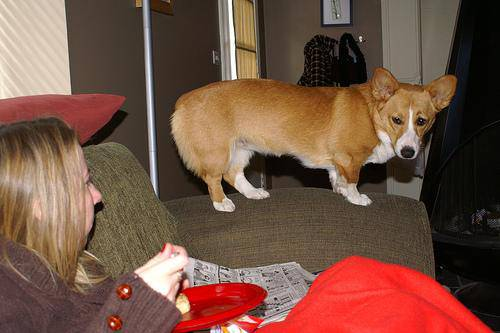

In [12]:
Image(filenames[10000])

In [13]:
labels_csv["breed"][10000]

'pembroke'

## Preparing labels

In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy()

In [15]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
#check if labels matches filenames in length
if len(labels) == len(filenames):
  print("on track")
else:
  print('error')

on track


In [17]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
#turn a single label into an array of booleans
print(labels[10])
labels[10] == unique_breeds

shetland_sheepdog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
#turn every label into a bool array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
#turning boolean array into intergers
print(labels[10]) #example label
print(np.where(unique_breeds == labels[10])) #index where example label occurs
print(boolean_labels[10].argmax()) #index where label occurs in boolean array
print(boolean_labels[10].astype(int)) ##assignin g a "1" where example label occurs

shetland_sheepdog
(array([99]),)
99
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## creating a validation set

Note that the data gotten from kaggle didnt provide a validation set

In [21]:
# setup X&y labels
X = filenames
y = boolean_labels

Advise is to start off experimemnt with ~1000  images and increae as needed


In [22]:
# ser number of images to use for experimemnting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [23]:
#spliting data into train and validation
from sklearn.model_selection import train_test_split

np.random.seed(84)
#split into training and validatiion of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2)


## preprocessing images (turning images into tensors)

turning images into tensors to preprocess our images into tensors we are going to write a function which does a few things

1. Take an image filepath as input
2. Use TF to read the fle and save it to a variable "image
3. Turn "image" (a jpg) into Tensors
4. normalize our image (convert color channel values from 0-255 to 0-1
5. Resize the "image" to be a shape of (224,224)
6. return the modified "image"

In [24]:
#convert image to numpy array

from matplotlib.pyplot import imread
image = imread(filenames[10])
image.shape


(500, 375, 3)

In [25]:
print(image[:2].shape)
image[:2]

(2, 375, 3)


array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)

In [26]:
#turn into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)>

In [27]:
#define image size
IMG_SIZE = 224

# create a function for preprocessing image

def process_image(image_path, img_size = IMG_SIZE):
  """
  takes an image file path anf turns the image into  a tensor
  """
  #read in an image file
  image = tf.io.read_file(image_path)

  #turn the jpg into numerical tensor with 3 color channels RGB
  image = tf.image.decode_jpeg(image, channels=3)

  #convert the color channel values from 0-255 to 0-1values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #resize the image to desired value(224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning data into batches

WHY? in trying to process say.. 10,000 images in one go, they all might not fit into memory

hence lecun adviced we do about 32 images at a time

in order to use TF effectively data wshould be in the form of Tensor tuples such as (image, label)

In [28]:
# create a simple functiion to return a tuple of tensors(image, label)

def get_image_label(image_path, label):
  """
  takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  
  image = process_image(image_path)
  return image, label

Now we have a wAY TO turn dta into tuples of tensors in the form, (image, tuples) now we make a function to turn all into batches

In [29]:
#define the batch size
BATCH_SIZE = 32

#create a function to turn data in batches
def create_data_batches(X,y= None, batch_size = BATCH_SIZE, valid_data=False, test_data= False):
  """
  creates batches of data out of image(X) and label(y) pairs
  shuffles the data if its a training data but doesnt shuffe validation data
  also accepts test data as input(no labels)
  """
  # if the data is a test dataset, we prob dont have labels
  if test_data:
    print("Creating test data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # if data is in valid dataset, no need to shuffle
  elif valid_data:
    print("creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  #if in train dataset
  else:
    print("creating training data batches...")

    #turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    #shuffling pathnames and labels before mapping iage processor dunction is faster than shuffling images
    data = data.shuffle(buffer_size= len(X))

    # create (image, label) tuples (this also turns the image path into a preprocessed image)
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
  return data_batch

In [30]:
# create training and validation data
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

creating training data batches...
creating validation data batches...


## visualizing data batches

In [31]:
import matplotlib.pyplot as plt

#create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  dsplays a plot of 25 images and their labels from a data batch
  """

  #setup the figure
  plt.figure(figsize= (10,10))

  #loop through 25(for disp 25 image)
  for i in range(25):
    #create subplots(5 rows, 5 columns)
    ax = plt.subplot(5,5,  i+1)
    #disp an image
    plt.imshow(images[i])
    #add th eimage lable as title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [32]:
train_images, train_labels = next(train_data.as_numpy_iterator())

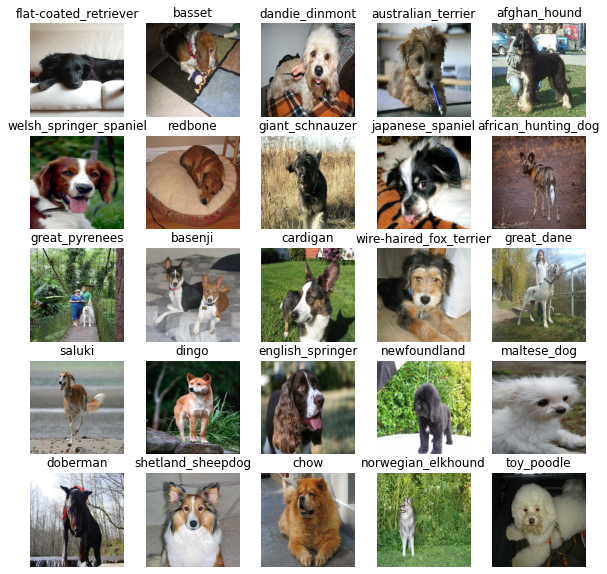

In [33]:
# now lets visualise in a trainign batch
show_25_images(train_images, train_labels)

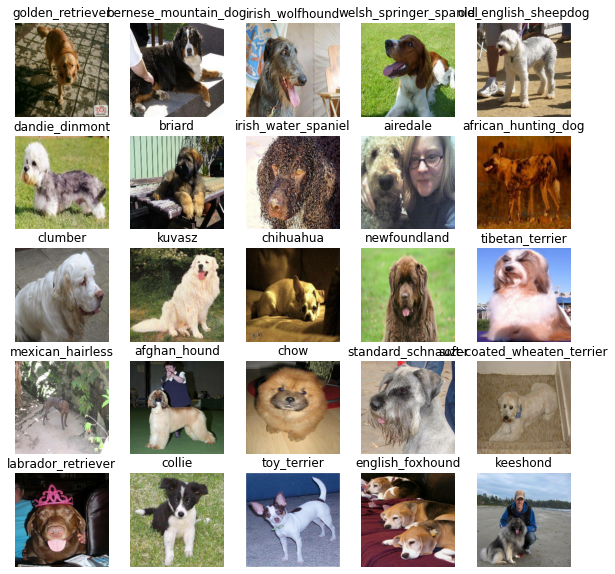

In [34]:
# now visualize valid batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building the model

Before Building we need define a few param
1. input shape
2. output shape
3. the URL of the model to use from tfhub.dev


In [35]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height , width , colour channel

#Setup out =put shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# settup model URL from tensor flowhub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

Now we have input output and model ready, lets put them together into a keras deep learning model

knowing this, lets crea a funftion 
* takes the inut shape, output shape and the model we have chosen as parameter
* defines te layer in a keras model in sequential dfashion (do this first then this then that)
* compiles the model (says how it shouldbe evaluated and improved)
* builds the model(tells the model the shape it would be geting)
* returns the model

All this steps are keras overview

In [36]:
from tensorflow.python import metrics
# create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url = MODEL_URL):
  print("building model with:", MODEL_URL)

  #setup the model layers
  model = tf.keras.Sequential([
                              hub.KerasLayer(MODEL_URL), #layer 1 (input layer)
                              tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax") #layer 2(output layer)
  ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  #build the model
  model.build(INPUT_SHAPE)

  return model

In [37]:
model = create_model()
model.summary()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,628,953
Trainable params: 120,240
Non-trainable params: 5,508,713
_________________________________________________________________


### Creating Callbacks

Callbacks are helpr functions a model can use during trainng to do things like save its progress check it progreess or stop  training early if a model stops improving

We'll create two callbacks
1. for tensorboard which helps track models progress 
2. early stopping prevents the modle for ttraining for too long before it overfits

### tensorboard callbacks

to setup a tensorboard call back we need to do 3 thinbgs
1. load the tensroboard extension
2. create a tensorbpard callback whicb is ble toi svae llogs to a directory and pas it to out models fit function
3. visualise pur models training logs with the %tensorboard magic duntions(done are model training )

In [38]:
# load tensorboard notebook extension
%load_ext tensorboard


In [39]:
import datetime

#create a function to build a tensorboard callback
def create_tensorboard_callback():
  #create a log directory for soting tensorboard log
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/logs", 
                        # make it so that logs get tracked whenever an experriment is run
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### early stopping callbacks

Helps stop the model from overfiting by stopping trainiing if  a certain evulation metrics stops improving 

In [40]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)